In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import mysql.connector
from faker import Faker
import seaborn as sns
from mysql.connector import Error
from mysql.connector.pooling import MySQLConnectionPool

In [3]:
url = "https://raw.githubusercontent.com/guilhermem0101/ml-book-exemplos/main/dados_combinados.csv"
df = pd.read_csv(url)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
df = df.dropna(how='all')

In [5]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [6]:
df = df[df['Quantity Ordered'] != 'Quantity Ordered']
df = df[df['Price Each'] != 'Price Each']
df = df[df['Order Date'] != 'Order Date']

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])



C:\Users\guilh\AppData\Local\Temp\ipykernel_23280\2371047603.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [7]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] 

In [7]:
nome_arquivo = 'dados_transformados.csv'
df.to_csv(nome_arquivo, index=False)

In [8]:
df.set_index('Order Date', inplace=True)
serie_temporal_dia = df.resample('D')['Sales'].sum()
serie_temporal_semana = df.resample('W')['Sales'].sum()
serie_temporal_mes = df.resample('M')['Sales'].sum()

In [9]:
serie_temporal_dia

Order Date
2019-01-01     65681.94
2019-01-02     70813.20
2019-01-03     47046.20
2019-01-04     62012.21
2019-01-05     46524.63
                ...    
2019-12-28    134015.50
2019-12-29    156024.62
2019-12-30    152319.81
2019-12-31    131454.30
2020-01-01      8670.29
Freq: D, Name: Sales, Length: 366, dtype: float64

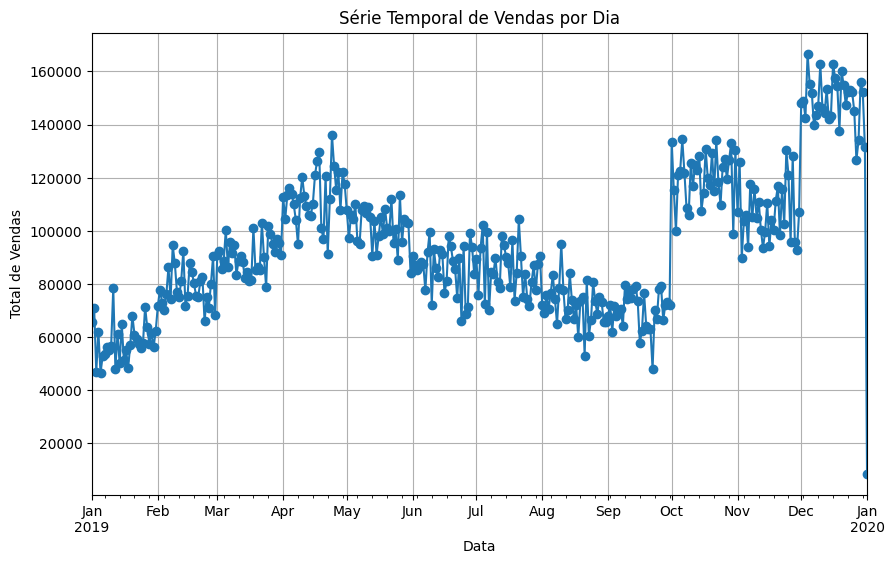

In [9]:
# Plotar o gráfico da série temporal
plt.figure(figsize=(10, 6))
serie_temporal_dia.plot(kind='line', marker='o')
plt.title('Série Temporal de Vendas por Dia')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

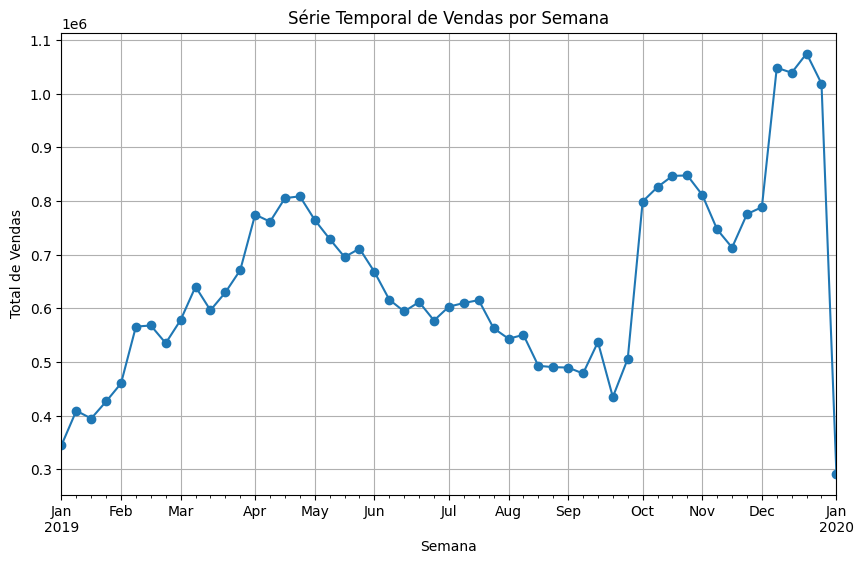

In [39]:
plt.figure(figsize=(10, 6))
serie_temporal_semana.plot(kind='line', marker='o')
plt.title('Série Temporal de Vendas por Semana')
plt.xlabel('Semana')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

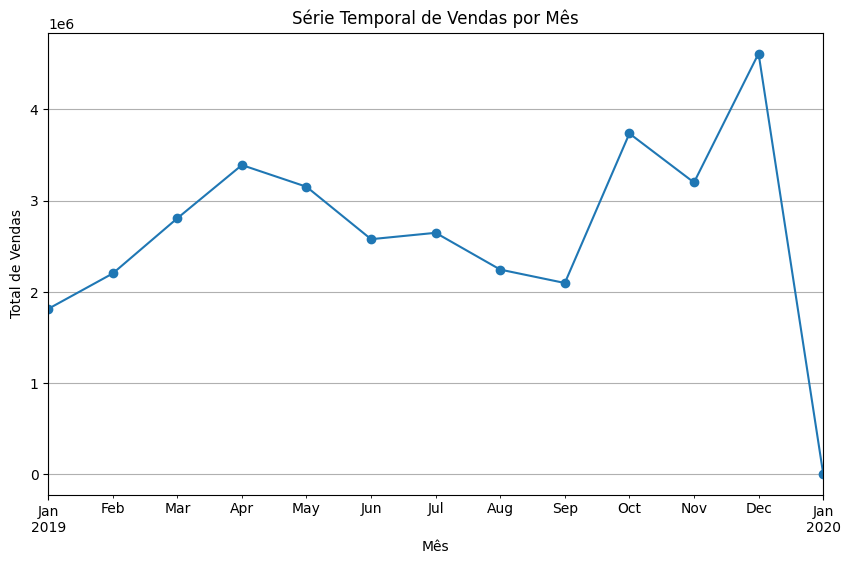

In [29]:
# Plotar o gráfico da série temporal por mês
plt.figure(figsize=(10, 6))
serie_temporal_mes.plot(kind='line', marker='o')
plt.title('Série Temporal de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185950 entries, 2019-04-19 08:46:00 to 2019-09-30 00:18:00
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Sales             185950 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.9+ MB


In [18]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90
2019-01-01 06:13:00,141732,iPhone,1,700.00,"446 Pine St, Atlanta, GA 30301",700.00
2019-01-01 06:34:00,149620,Lightning Charging Cable,1,14.95,"338 Chestnut St, San Francisco, CA 94016",14.95
2019-01-01 06:41:00,142451,AAA Batteries (4-pack),1,2.99,"232 12th St, Boston, MA 02215",2.99
2019-01-01 07:24:00,146039,34in Ultrawide Monitor,1,379.99,"53 River St, San Francisco, CA 94016",379.99


In [ ]:

# Especifica o caminho para a pasta que contém os arquivos CSV
caminho_pasta = '.\data\projeto dados'

# Usando glob para encontrar todos os arquivos CSV na pasta
arquivos_csv = glob.glob(caminho_pasta + '.csv')

# Inicializa um DataFrame vazio para armazenar os dados combinados
arquivos_csv = [arquivo for arquivo in os.listdir(caminho_pasta) if arquivo.endswith(".csv")]

# Inicialize um DataFrame vazio para armazenar os dados combinados
df = pd.DataFrame()

# Loop através dos arquivos CSV e combine-os no DataFrame
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(caminho_pasta, arquivo)
    df_temporario = pd.read_csv(caminho_arquivo)
    df = pd.concat([df, df_temporario], ignore_index=True)

# Salve o DataFrame combinado em um novo arquivo CSV
df.head(10)

In [11]:
# df.shape
df.describe().round(2)

,Quantity Ordered,Price Each,Sales
count,185950.00,185950.00,185950.00
mean,1.12,184.40,185.49
std,0.44,332.73,332.92
min,1.00,2.99,2.99
25%,1.00,11.95,11.95
50%,1.00,14.95,14.95
75%,1.00,150.00,150.00
max,9.00,1700.00,3400.00


In [12]:

df = df.sort_values(by='Order Date')
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90
2019-01-01 06:13:00,141732,iPhone,1,700.00,"446 Pine St, Atlanta, GA 30301",700.00
2019-01-01 06:34:00,149620,Lightning Charging Cable,1,14.95,"338 Chestnut St, San Francisco, CA 94016",14.95
2019-01-01 06:41:00,142451,AAA Batteries (4-pack),1,2.99,"232 12th St, Boston, MA 02215",2.99
2019-01-01 07:24:00,146039,34in Ultrawide Monitor,1,379.99,"53 River St, San Francisco, CA 94016",379.99


In [13]:
quantidade_nan = df['Order ID'].isna().sum()
quantidade_nan

0

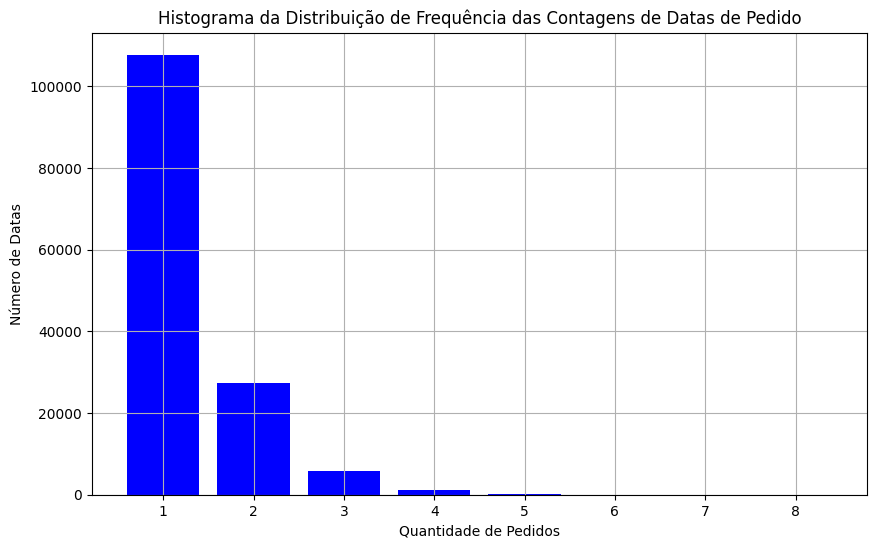

In [8]:
freq = df["Order Date"].value_counts()

max_freq = freq.max()
freq = freq[freq != max_freq]
order_date = freq.value_counts()
order_date
plt.figure(figsize=(10, 6))
plt.bar(order_date.index, order_date.values, color='blue')
plt.xlabel('Quantidade de Pedidos')
plt.ylabel('Número de Datas')
plt.title('Histograma da Distribuição de Frequência das Contagens de Datas de Pedido')
plt.grid(True)
plt.show()


In [15]:
unique_addresses = df['Purchase Address'].drop_duplicates()
unique_addresses.values 

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [16]:
# compras com mesma data e mesmo endereço indicam mesmo pedido
pedidos_compostos = df[df.duplicated(['Order Date', 'Purchase Address'], keep='first')]
pedidos_compostos.head(10)

KeyError: Index(['Order Date'], dtype='object')

In [46]:

len(pedidos_compostos)

7867

In [23]:
unique_Product = df['Product'].drop_duplicates()
unique_Product.values

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [24]:
len(unique_Product.values)

19

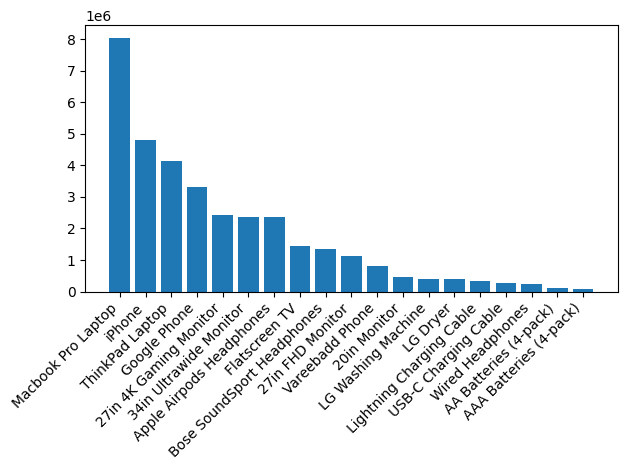

In [16]:
quantidade_vendida = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(quantidade_vendida.index, quantidade_vendida.values)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

In [17]:
qtd_por_produto = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
qtd_por_produto
# fig, ax = plt.subplots()
# ax.bar(vendas_por_produto.index, vendas_por_produto.values)
# plt.xticks(rotation=45, ha='right') 
# plt.tight_layout()

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [35]:
# def extract_city(address):
#     parts = address.split(',')
#     if len(parts) >= 2:
#         return parts[1]
#     else:
#         return 'Unknown'

# df['City'] = df['Purchase Address'].apply(extract_city)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 73891 to 124955
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   City              186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [47]:
url = "https://raw.githubusercontent.com/guilhermem0101/ml-book-exemplos/main/dados_transformados.csv"
df = pd.read_csv(url)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99


In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [50]:
# funtction to get the city in the data
def get_city(address):
    return address.split(',')[1]

# funtction to get the state in the data
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df['Cities'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 


In [53]:
cidades_mais_vendas=df.groupby('Cities')['Sales'].sum().sort_values(ascending=False)
cidades_mais_vendas

Cities
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales, dtype: float64

In [57]:
def cidades_mais_vendas_por_periodo(data_inicial, data_final):
    # Converta as colunas de datas para o tipo datetime, se ainda não estiverem
    df['Order Date'] = pd.to_datetime(df['Order Date'])

    # Filtra os dados com base no período de tempo especificado
    filtro = (df['Order Date'] >= data_inicial) & (df['Order Date'] <= data_final)
    df_filtrado = df[filtro]

    # Realiza o agrupamento por cidades e calcula a soma das vendas
    cidades_mais_vendas = df_filtrado.groupby('Cities')['Sales'].sum().sort_values(ascending=False)

    return cidades_mais_vendas

# Especifica o período de tempo desejado
data_inicial = pd.to_datetime('2019-01-01')
data_final = pd.to_datetime('2019-06-30')

# Chama a função com as datas especificadas
cidades_mais_vendas_periodo = cidades_mais_vendas_por_periodo(data_inicial, data_final)

# Imprime os resultados
cidades_mais_vendas_periodo


Cities
 San Francisco (CA)    3856110.12
 Los Angeles (CA)      2550980.10
 New York City (NY)    2130756.40
 Boston (MA)           1642001.39
 Atlanta (GA)          1290679.12
 Dallas (TX)           1253673.39
 Seattle (WA)          1223437.75
 Portland (OR)          875922.89
 Austin (TX)            823308.50
 Portland (ME)          213182.56
Name: Sales, dtype: float64

In [49]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
count.most_common(10)


C:\Users\guilh\AppData\Local\Temp\ipykernel_23280\450176065.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [29]:
def conecta_db():
    conn = mysql.connector.connect(
        host="aws.connect.psdb.cloud",
        database="analises",
        user="ly7zgpacdo3pwnk1fu9g",
        password="pscale_pw_eIlAxFAlwv9pHRMiEFFb2xWFd3Am3q8GItINDSCE26p"

    )
    return conn


# Insert global
def inserir_dados(sql, values):
    con = conecta_db()
    cur = con.cursor()
    cur.execute(sql, values)
    con.commit()
    con.close()

In [ ]:


fake = Faker()

def inserir_dados_cli(enderecos):
    sql = "INSERT INTO Clientes (CPF, NomeCliente, Endereco, Email) VALUES (%s, %s, %s, %s)"

    for endereco in enderecos:
        cpf = str(fake.random_int(min=10000000000, max=99999999999))
        nome_cliente = fake.name()
        email = fake.email()
        values = (cpf, nome_cliente, endereco, email)

        inserir_dados(sql, values)
        
inserir_dados_cli(unique_addresses.values)


In [31]:
fake = Faker()
def inserir_dados_produtos(produtos):
    sql = "INSERT INTO Produtos (IDProduto, NomeProduto, CategoriaProduto, QuantidadeEstoque) VALUES (%s, %s, %s, %s)"

    for produto in produtos:
        id_produto = fake.random_int(min=1, max=1000)  # Defina o intervalo apropriado para IDs de produtos
        nome_produto = produto  # Nome do produto
        categoria_produto = ''  # Categoria do produto
        quantidade_estoque = fake.random_int(min=0, max=1000)  # Quantidade em estoque (ajuste conforme necessário)
        values = (id_produto, nome_produto, categoria_produto, quantidade_estoque)

        inserir_dados(sql, values)
        
inserir_dados_produtos(unique_Product.values)

In [ ]:
def insert_client_data2(enderecos):
    sql = "INSERT INTO Clientes (CPF, NomeCliente, Endereco, Email) VALUES (%s, %s, %s, %s)"

    try:
        connection = conecta_db()
        if connection:
            cursor = connection.cursor()
            data_to_insert = []
            for endereco in enderecos:
                cpf = str(fake.random_int(min=10000000000, max=99999999999))
                nome_cliente = fake.name()
                email = fake.email()
                data_to_insert.append((cpf, nome_cliente, endereco, email))
            cursor.executemany(sql, data_to_insert)
            connection.commit()
    except Error as e:
        print("Error:", e)
    finally:
        if connection:
            connection.close()

# Assuming unique_addresses is a list of addresses
insert_client_data2(unique_addresses)


In [33]:
df.count()

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
dtype: int64

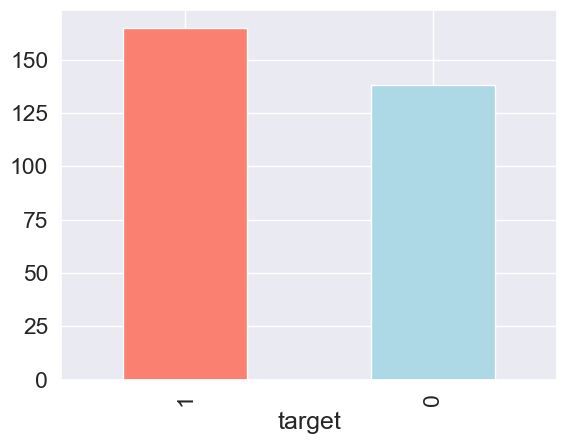

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {"KNN": KNeighborsClassifier(),
           "Logistc Regression": LogisticRegression(max_iter=1000),
           "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistc Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}